In [1]:
pip install qiskit-nature

Note: you may need to restart the kernel to use updated packages.


In [2]:
from qiskit_algorithms import VQE as VQE1

In [3]:
import numpy as np
import qiskit_nature
qiskit_nature.settings.use_pauli_sum_op = False
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
from qiskit.primitives import Estimator, BackendEstimator
#from qiskit.algorithms.minimum_eigensolvers import VQE as VQE1
# from qiskit.algorithms import VQE


In [4]:
from qiskit_algorithms import VQE as VQE2
from qiskit_algorithms import estimate_observables
from qiskit_algorithms.optimizers import COBYLA, SLSQP,SPSA,GradientDescent
from qiskit_algorithms.utils import algorithm_globals

In [5]:
pip install SciencePlots

Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np
import qiskit_nature
qiskit_nature.settings.use_pauli_sum_op = False
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
from qiskit.primitives import Estimator, BackendEstimator
#from qiskit.algorithms.minimum_eigensolvers import VQE as VQE1
#from qiskit.algorithms import VQE as VQE2
#from qiskit.algorithms.observables_evaluator import estimate_observables
#from qiskit.algorithms.optimizers import COBYLA, SLSQP,SPSA,GradientDescent
from qiskit.circuit import QuantumCircuit, Parameter
from qiskit.circuit.library import TwoLocal
from qiskit_nature.second_q.operators import FermionicOp
from qiskit_nature.second_q.mappers import JordanWignerMapper
from qiskit.quantum_info import Pauli, SparsePauliOp
#from qiskit.utils import algorithm_globals
from fractions import Fraction
from scipy.sparse.linalg import eigsh
from qiskit import QuantumCircuit
from qiskit.circuit import Gate
from qiskit_aer import Aer
from qiskit import *
from qiskit.circuit import Parameter
import scienceplots
plt.style.use(['science','notebook','grid'])
#from qiskit.opflow import I, X, Z,Y


In [7]:

with open('Qbit_mapped_all_M_JUN45.out','r') as f:
    lines = f.readlines()
    N_Qbits = int(lines[1].split('=')[1])
    # print(lines)
    two_body_string = 'Qubit mapped matrix elements of V All M'
    two_body_string_end = 'End V'

    One_body_string = 'Qubit mapped matrix elements of KE all M'
    One_body_string_end = 'End KE'

    for i,line in enumerate(lines):
        if two_body_string in line:
            # print(i,line)
            start_V = i
        if two_body_string_end in line:
            # print(i,line)
            end_V = i
        if One_body_string in line:
            # print(i,line)
            start_KE = i
        if One_body_string_end in line:
            # print(i,line)
            end_KE = i
    
    Hamiltonian_Coeff = {}
    for line in lines[start_V+1:end_V]:
        # print(line)
        data = line.split()
        key = '+_{} +_{} -_{} -_{}'.format(data[0],data[1],data[3],data[2]) #0=i,1=j,2=k,3=l
        value = float(data[-1])
        # print(key,value)
        Hamiltonian_Coeff[key] = value#*0.5        #multiply by 0.5
    
    for line in lines[start_KE+1:end_KE]:
        data = line.split()
        key = '+_{} -_{}'.format(data[0],data[1])
        value = float(data[-1])
        # print(key,value)
        # Hamiltonian_Coeff[key] = value

with open('Input_pfg_m_scheme.in', 'r') as f:
    lines = f.readlines()
    l1 = lines[0].split('=')[1].replace('[','').replace(']','').split(',')
    # print(l1)
    levels = {}
    for l in l1:
        data = l.split(':')
        # print(data)
        levels[int(data[0])] = (data[1].replace('\'', '')).replace('\n', '')
    print('levels = {}'.format(levels))


    l2 = lines[1].split('=')[1].replace('[', '').replace(']', '').split(',')
    # print(l2)
    energies = {}
    for l in l2:
        data = l.split(':')
        energies[int(data[0])] = float(data[1])
    print('energes = {}'.format(energies))

ene=[]
for key, val in levels.items():
    j = float(Fraction(val.split(';')[0][2:]))
    ene = ene+[energies[key]]*int(2*j+1)
print(ene)

for i in range(N_Qbits):
    key = '+_{} -_{}'.format(i,i)
    value = ene[i]
    # print(key,value)
    Hamiltonian_Coeff[key] = value


print(end_V-start_V-1)


levels = {1: '1p3/2;n', 2: '0f5/2;n', 3: '1p1/2;n'}
energes = {1: -9.828, 2: -8.7087, 3: -7.8388}
[-9.828, -9.828, -9.828, -9.828, -8.7087, -8.7087, -8.7087, -8.7087, -8.7087, -8.7087, -7.8388, -7.8388]
620


In [8]:
        

# print(Hamiltonian_Coeff)
print(N_Qbits)



Hamiltonian_op = FermionicOp(
    Hamiltonian_Coeff,
    num_spin_orbitals=N_Qbits,
)


Hamiltonian_op
# outputfile  = open('output.out','w')
# outputfile.write('Hamiltonian Op {} \n\n'.format(Hamiltonian_op))

mapper = JordanWignerMapper()
qubit_hamiltonian = mapper.map(Hamiltonian_op)
if not isinstance(qubit_hamiltonian, SparsePauliOp):
        qubit_hamiltonian = qubit_hamiltonian.primitive


print(len(qubit_hamiltonian))


12
1691


In [9]:


if N_Qbits==12:
    reference_value=-11.932


# # if N_Qbits <12:
# eigenvalues, eigenstates = np.linalg.eigh(qubit_hamiltonian.to_matrix())
# eigenvalues, eigenvectors = eigsh(qubit_hamiltonian.to_matrix(), k=6,which='SA')
# eigenvalues
# print(eigenvalues)
#reference_value = eigenvalues[0]
# reference_value = 0.484989990
reference_value = -20.024 # 12 qubit
#reference_value = -20.149  # 22 qubit


print("Exact binding energy for H = {}".format(reference_value))

print(qubit_hamiltonian.paulis)
print(qubit_hamiltonian.coeffs)
# Pauli_gates = qubit_hamiltonian.paulis
# Gate_coeff = qubit_hamiltonian.coeffs


Exact binding energy for H = -20.024
['IIIIIIIIIIII', 'IIIIIIIIIIZI', 'IIIIIIZIIIII', 'IIIIIIZIIIZI',
 'IIIIYZIZZZYI', 'IIIIXZIZZZXI', 'IIIIZIIIIIII', 'IIIIZIZIIIII',
 'IIIIZIIIIIZI', 'IIIIXZYIXZYI', 'IIIIXZXIYZYI', 'IIIIYZYIYZYI',
 'IIIIYZXIXZYI', 'IIIIXZYIYZXI', 'IIIIXZXIXZXI', 'IIIIYZYIXZXI',
 'IIIIYZXIYZXI', 'IIXZYIXZZZYI', 'IIYZYIYZZZYI', 'IIXZXIYZZZYI',
 'IIYZXIXZZZYI', 'IIXZYIYZZZXI', 'IIYZYIXZZZXI', 'IIXZXIXZZZXI',
 'IIYZXIYZZZXI', 'XZZZYIXZZZYI', 'YZZZYIYZZZYI', 'XZZZXIYZZZYI',
 'YZZZXIXZZZYI', 'XZZZYIYZZZXI', 'YZZZYIXZZZXI', 'XZZZXIXZZZXI',
 'YZZZXIYZZZXI', 'IIIIIIIIZIII', 'IIIIIIZIZIII', 'IIYZZZIZYIII',
 'IIXZZZIZXIII', 'YZZZZZIZYIII', 'XZZZZZIZXIII', 'IIZIIIIIIIII',
 'IIZIIIZIIIII', 'ZIIIIIIIIIII', 'ZIIIIIZIIIII', 'IIIIIIIIZIZI',
 'IIYZZZZZYIZI', 'IIXZZZZZXIZI', 'YZZZZZZZYIZI', 'XZZZZZZZXIZI',
 'IIIIYZZZIZYI', 'IIIIXZZZIZXI', 'IIIIIIXZYXYI', 'IIIIIIYZYYYI',
 'IIIIIIXZXYYI', 'IIIIIIYZXXYI', 'IIIIIIXZYYXI', 'IIIIIIYZYXXI',
 'IIIIIIXZXXXI', 'IIIIIIYZXYXI', 'IIIXZZYIXZYI', 'III

In [10]:
import numpy as np

# Define Pauli operators
I = np.array([[1,0],[0,1]])  # Identity matrix
X = np.array([[0, 1], [1, 0]])  # Pauli X matrix
Y = np.array([[0, -1j], [1j, 0]])  # Pauli Y matrix
Z = np.array([[1, 0], [0, -1]])  # Pauli Z matrix

def String_to_PauliOP(S):
    if S == 'I':
        return I
    elif S == 'X':
        return X
    elif S == 'Y':
        return Y
    elif S == 'Z':
        return Z
    else:
        raise ValueError(f"Invalid string input: {S}")



#def String_to_PauliOP(S):
    #if S == 'I':
        #return I
    #elif S == 'X':
        #return X
    #elif S == 'Y':
        #return Y
    #elif S == 'Z':
        #return Z
    

# # H_op
# # H_op=qubit_hamiltonian.coeffs[0]
'''H_op=qubit_hamiltonian.coeffs[0]*String_to_PauliOP(str(qubit_hamiltonian.paulis[0][0]))
for s in qubit_hamiltonian.paulis[0][1:]:
    H_op = H_op^String_to_PauliOP(str(s))'''
    

'H_op=qubit_hamiltonian.coeffs[0]*String_to_PauliOP(str(qubit_hamiltonian.paulis[0][0]))\nfor s in qubit_hamiltonian.paulis[0][1:]:\n    H_op = H_op^String_to_PauliOP(str(s))'

In [11]:
import numpy as np

# Define Pauli operators
I = np.array([[1,0],[0,1]])  # Identity matrix
X = np.array([[0, 1], [1, 0]])  # Pauli X matrix
Y = np.array([[0, -1j], [1j, 0]])  # Pauli Y matrix
Z = np.array([[1, 0], [0, -1]])  # Pauli Z matrix

def String_to_PauliOP(S):
    if S == 'I':
        return I
    elif S == 'X':
        return X
    elif S == 'Y':
        return Y
    elif S == 'Z':
        return Z
    else:
        raise ValueError(f"Invalid string input: {S}")

H_op=qubit_hamiltonian.coeffs[0]
H_op=qubit_hamiltonian.coeffs[0]*String_to_PauliOP(str(qubit_hamiltonian.paulis[0][0]))
for s in qubit_hamiltonian.paulis[0][1:]:
      #H_op = H_op^String_to_PauliOP(str(s))
      H_op = np.kron(H_op, String_to_PauliOP(str(s)))

    
for Pauli_ops, coefs in zip(qubit_hamiltonian.paulis[1:],qubit_hamiltonian.coeffs[1:]):
     term = coefs*String_to_PauliOP(str(Pauli_ops[0]))
     for s in Pauli_ops[1:]:
        # print(s)
         #term = term^String_to_PauliOP(str(s))
         term = np.kron(term, String_to_PauliOP(str(s)))
     H_op += term
    
print(H_op)    


[[-1.26565425e-14+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j ...
   0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j]
 [ 0.00000000e+00+0.j -7.83880000e+00+0.j  0.00000000e+00+0.j ...
   0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j]
 [ 0.00000000e+00+0.j  0.00000000e+00+0.j -7.83880000e+00+0.j ...
   0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j]
 ...
 [ 0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j ...
  -9.49067020e+01+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j]
 [ 0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j ...
   0.00000000e+00+0.j -9.49067020e+01+0.j  0.00000000e+00+0.j]
 [ 0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j ...
   0.00000000e+00+0.j  0.00000000e+00+0.j -1.02083502e+02+0.j]]


In [12]:
def Single_excitation(phi):
    circ = QuantumCircuit(2,name='Single Excitation')
    circ.cx(0,1)
    circ.ry(phi/2,0)
    circ.cx(1,0)
    circ.ry(-phi/2,0)
    circ.cx(1,0)
    circ.cx(0,1)
    return circ


def Double_excitation(theta):
    circ = QuantumCircuit(4,name='Double Excitation')
    circ.cx(2,3)
    circ.cx(0,2)
    circ.h([0,3])
    circ.cx(0,1)
    circ.cx(2,3)
    circ.ry(-theta/8,0)
    circ.ry(theta/8,1)
    circ.cx(0,3)
    circ.h(3)
    circ.cx(3,1)
    circ.ry(-theta/8,0)
    circ.ry(theta/8,1)
    circ.cx(2,1)
    circ.cx(2,0)
    circ.ry(theta/8,0)
    circ.ry(-theta/8,1)
    circ.cx(3,1)
    circ.h(3)
    circ.cx(0,3)
    circ.ry(theta/8,0)
    circ.ry(-theta/8,1)
    circ.cx(0,1)
    circ.cx(2,0)
    circ.h([0,3])
    circ.cx(0,2)
    circ.cx(2,3)
    return circ


def Ensatz(Qbits,InitialState,Thetas):
    circ = QuantumCircuit(Qbits,name='Ensatz')
    circ.x(InitialState)
    Nmax_dble = Qbits//2 - 1
    Initial_qbit=0
    for i in range(Nmax_dble):
        doubleExci = Double_excitation(Thetas[i])
        circ.append(doubleExci,list(range(Initial_qbit,Initial_qbit+4)))
        Initial_qbit += 2
    return circ


def Exci_Ensatz(Qbits,InitialState,Phis,Ground,Excite,double=True):
    print(Ground,Excite)
    print(len(Ground),len(Excite))
    circ = QuantumCircuit(Qbits,name='Exci_Ensatz')
    circ.x(InitialState)
    # for i in range(2)
    singleExcite = Single_excitation(Phis[0]) # 12 qubit
    # circ.append(singleExcite,[3,5])
    circ.append(singleExcite,[3,9])

    singleExcite = Single_excitation(Phis[1]) # 12 qubit
    circ.append(singleExcite,[3,11])

    singleExcite = Single_excitation(Phis[2]) # 12 qubit
    circ.append(singleExcite,[1,7])

    # singleExcite = Single_excitation(Phis[3])   # 22 qubit
    # circ.append(singleExcite,[3,21])

    # singleExcite = Single_excitation(Phis[4])    # 22 qubit
    # circ.append(singleExcite,[1,19])
    if double:
        for i in range(len(Ground)):
            doubleExci = Double_excitation(Phis[i+2])
            circ.append(doubleExci,Ground[i]+Excite[i])
    
    return circ


PhiParameters = []
for i in range(23):
    phi = Parameter('phi_{}'.format(i))         # for different theta at every excitation
    PhiParameters.append(phi)


gs_ini = [1,3]
no_of_ops = 5
db_exc = [[5,8],[5,10],[2,5],[7,9],[7,11]]
ansatz = Exci_Ensatz(N_Qbits,gs_ini,PhiParameters,Ground=[gs_ini]*no_of_ops,Excite=db_exc)  # 12 qubit
#ansatz = Exci_Ensatz(N_Qbits,[1,3],PhiParameters,Ground=[[1,3]]*19,Excite=[[5,8],[5,10],[2,5],[7,9],[7,11],[5,20],[7,21],[19,11],[19,9],[17,20],[17,10],[17,8],[15,18],[15,6],[15,0],[13,16],[13,4],[17,2],[19,21]])   # 22 qubit
# ansatz = Exci_Ensatz(N_Qbits,[1,3],PhiParameters,Ground=[[1,3]]*16,Excite=[[5,8],[5,10],[2,5],[7,9],[7,11],[5,20],[7,21],[19,11],[19,9],[17,20],[17,10],[17,8],[15,18],[15,6],[13,16],[13,4]])   # 22 qubit
# ansatz = Exci_Ensatz(N_Qbits,[1,3],PhiParameters,Ground=[[1,3]], Excite=[[1,5]],double=False)
ansatz.draw('mpl').savefig('Circuit_for_Ensatz.png')

def callback(eval_count, parameters, mean, std):
    # Overwrites the same line when printing
    display("Evaluation: {}, Energy: {}, Std: {}".format(eval_count, mean, std))
    clear_output(wait=True)
    counts.append(eval_count)
    values.append(mean)
    params.append(parameters)
    deviation.append(std)
    means.append(mean)


[[1, 3], [1, 3], [1, 3], [1, 3], [1, 3]] [[5, 8], [5, 10], [2, 5], [7, 9], [7, 11]]
5 5


In [13]:


seed = 600
algorithm_globals.random_seed = seed
counts = []
values = []
params = []
deviation = []
means=[]
Iterations=2000

backend = Aer.get_backend('qasm_simulator')
#from qiskit import BasicAer
#backend = BasicAer.get_backend('qasm_simulator')
# backend = Aer.get_backend('statevector_simulator')

Optimizer_name = 'COBYLA'
#Optimizer_name = 'SPSA'
# Optimizer_name = 'SLSQP'
# Optimizer_name = 'GradientDescent'

if Optimizer_name == 'COBYLA':
    optimizer = COBYLA(maxiter=Iterations)
elif Optimizer_name == 'SPSA':
    optimizer = SPSA(maxiter=Iterations,second_order=True,learning_rate=0.1,perturbation=0.1)
elif Optimizer_name == 'SLSQP':
    optimizer = SLSQP(maxiter=Iterations)
elif Optimizer_name == 'GradientDescent':
    optimizer = GradientDescent(maxiter=Iterations, learning_rate=0.1)

vqe = VQE1(
    # BackendEstimator(backend=backend),
    Estimator(),
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback,
)
# vqe = VQE2(
#     ansatz=ansatz,
#     optimizer=optimizer,
#     callback=callback,
#     quantum_instance=backend
# )
vqe_result = vqe.compute_minimum_eigenvalue(qubit_hamiltonian)
# vqe_result = vqe.compute_minimum_eigenvalue(H_op)

# print(params[-1])



'Evaluation: 173, Energy: -20.02213864799698, Std: {}'

[-0.297669609153159, -5.532237549990115, 5.857590288079786, 6.615902207505177, 0.5968429236747188, 6.768631483277847, 0.35371736191902414]
[]
[[1, 3], [1, 3], [1, 3], [1, 3], [1, 3]] [[5, 8], [5, 10], [2, 5], [7, 9], [7, 11]]
5 5
{'100010000000': 0.0045, '010000100000': 0.017375, '000000100100': 0.064625, '001010000000': 0.048875, '001000000010': 0.020625, '000100100000': 0.036875, '000010001000': 0.0385, '000000001010': 0.63225, '100000000010': 0.136375}


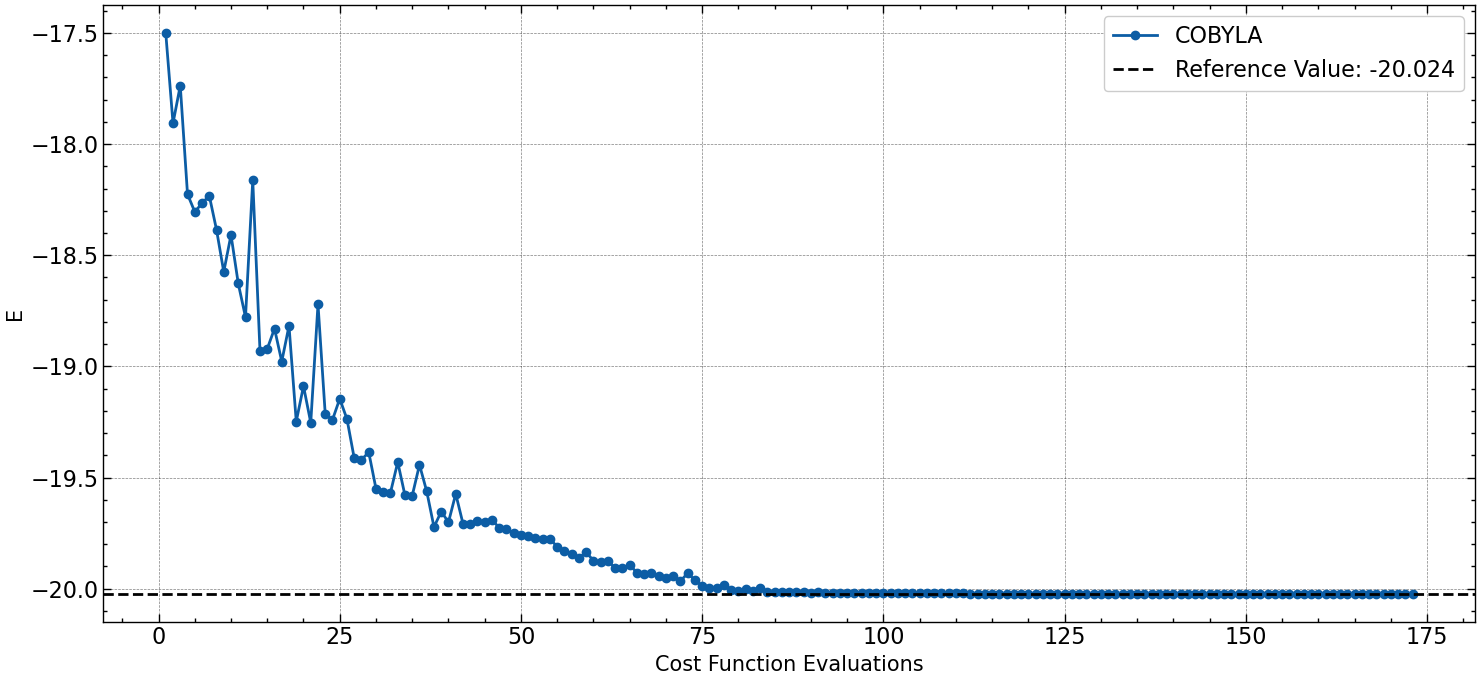

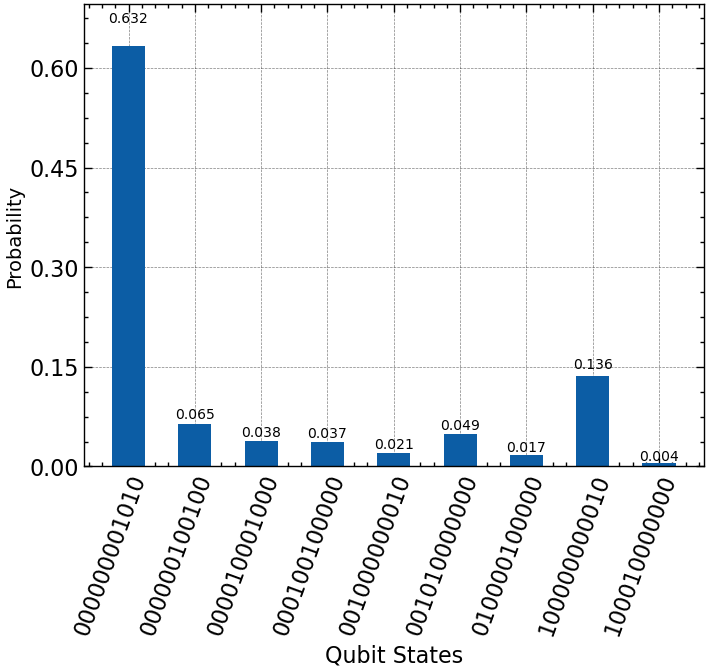

In [14]:

print(params[-1])
errors =[]
for d in deviation:
    if 'variance' in d.keys():
        errors.append(np.sqrt(d['variance']))
print(errors)

file = 'JW_result_'+Optimizer_name+'_'+str(N_Qbits)+'qbits.out'
with open(file,'w') as f:
    if len(errors)>1:
        for c,v,e in zip(counts,values,errors):
            f.write('{} \t {} \t {} \n'.format(c,v,e))
    else:
        for c,v in zip(counts,values):
            f.write('{} \t {} \n'.format(c,v))
        

fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches((15, 7))
ax.plot(counts, values, "o-", label=Optimizer_name)
ax.axhline(y=reference_value,color="k",linestyle="--",label=f"Reference Value: {reference_value}",)
if len(errors)>1:
    ax.errorbar(counts, values,
                yerr = errors,
                fmt ='o')
ax.legend()
ax.set_xlabel("Cost Function Evaluations", fontsize=15)
ax.set_ylabel(r"E".format(i + 1), fontsize=15)
plt.tight_layout()
fig.savefig('{}_Qbit_JUN45_VQE_2p_{}.png'.format(N_Qbits,Optimizer_name),dpi=350)
fig.savefig('{}_Qbit_JUN45_VQE_2p_{}.pdf'.format(N_Qbits,Optimizer_name),format='pdf')

file = 'WF_parameters_vqe'+Optimizer_name+'_'+str(N_Qbits)+'.out'
with open(file,'w') as f:
    for p in params[-1]:
        f.write('{} \n'.format(p))

Ground = Exci_Ensatz(N_Qbits,gs_ini,params[-1],Ground=[gs_ini]*no_of_ops,Excite=db_exc)
Ground.measure_all()
backend = Aer.get_backend('statevector_simulator')
# job = backend.run(i_state)
shots=8000
job = backend.run(transpile(Ground, backend), shots=shots)
result = job.result()
COUNTS = result.get_counts(Ground)

for key,val in COUNTS.items():
    COUNTS[key] = val/shots

print(COUNTS)
from qiskit.visualization import plot_histogram

fig1,ax1 = plt.subplots(nrows=1, ncols=1)
plot_histogram(COUNTS,ax=ax1)
ax1.set_ylabel('Probability')
ax1.set_xlabel('Qubit States')


fig1.savefig('Wavefunctions_{}_JUN45_VQE_2p_{}.png'.format(N_Qbits,Optimizer_name),dpi=350)
fig1.savefig('Wavefunctions_{}_JUN45_VQE_2p_{}.pdf'.format(N_Qbits,Optimizer_name),format='pdf')
